# Exercise 1

We first load a dataset and examine its dimensions.

In [54]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [55]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

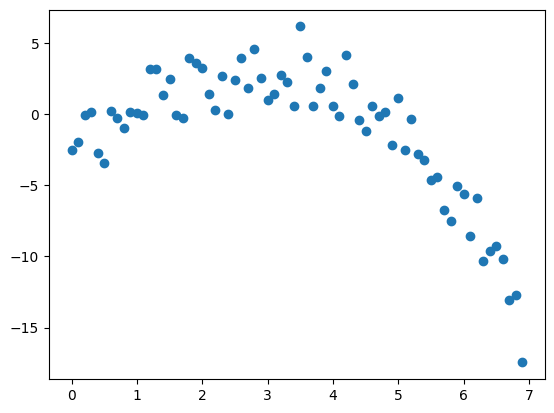

In [56]:
import matplotlib.pyplot as plt

plt.scatter(xy_data[:,0], xy_data[:,1])
plt.show()



### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [57]:
def polyreg(data_matrix, k):
    x_values = data_matrix[:,0]
    y_values = data_matrix[:,1]
    X = np.ones(np.shape(x_values))
    
    if k != 0:
        for i in range(1,k+1):
            X = np.column_stack((X, x_values**i))
        beta = np.linalg.lstsq(X, y_values, rcond=None)[0]
    else:
        beta = np.mean(y_values)
        
    fit = X.dot(beta)
    resid = y_values - fit

    return beta, fit, resid

Use the tests below to check the outputs of the function you have written:

In [58]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0]
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] # the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

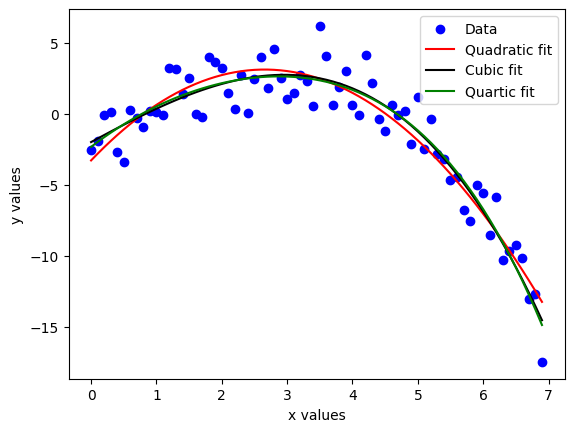

In [59]:
x_values = xy_data[:,0]
y_values = xy_data[:,1]

y2 = polyreg(xy_data, 2)[1]
y3 = polyreg(xy_data, 3)[1]
y4 = polyreg(xy_data, 4)[1]

plt.scatter(x_values, y_values, color = 'blue', label = 'Data')
plt.plot(x_values, y2, color = 'red', label = 'Quadratic fit')
plt.plot(x_values, y3, color = 'black', label = 'Cubic fit')
plt.plot(x_values, y4, color = 'green', label = 'Quartic fit')
plt.legend()
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

 #### State which model you choose and briefly justify your choice.
 
 
 I will select the cubic model as there seems to be very little improvement for higher order fits while significantly improving on the quadratic model.
 
 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

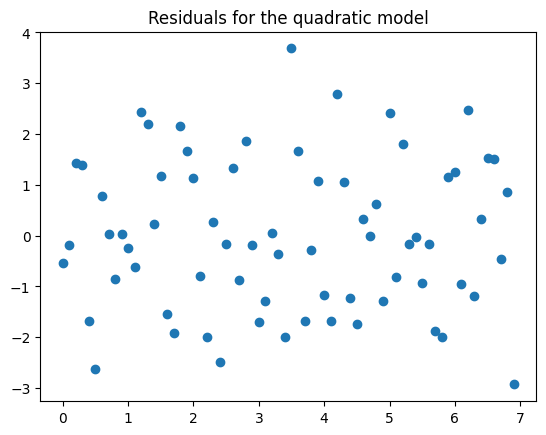

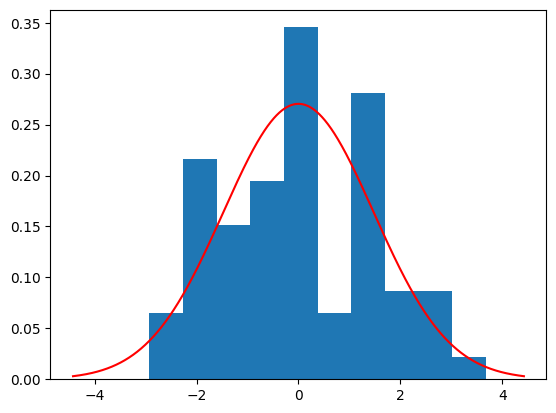

In [60]:
from scipy.stats import norm

resid = polyreg(xy_data, 3)[2]

plt.scatter(x_values, resid)
plt.title('Residuals for the cubic model')
plt.show()

standDev = np.std(resid)
n, bins, patches = plt.hist(resid, bins=10, density=True)

xvals = np.linspace(-3*standDev,3*standDev,1000)
plt.plot(xvals, norm.pdf(xvals, 0, scale=standDev), 'r')
plt.show()
